In [5]:
from numpy import genfromtxt
import numpy as np 
import matplotlib
import pylab as plt
import pandas as pd
from umap import UMAP, JUMAP

In [9]:
method = 'Specter' # 'Specter' CiteFuse
rna_matrix = np.genfromtxt('/data/data_nobackup/hoan/Mimitou/pbmc_nodoubletbycluster_minPts50_rna_pca_preprocessing_by_seurat.csv', delimiter=','); 
adt_matrix = np.genfromtxt('/data/data_nobackup/hoan/Mimitou/pbmc_nodoubletbycluser_minPts50_adt_pca_preprocessing_by_seurat.csv', delimiter=',');
if method == 'Specter':
    y = np.genfromtxt('/data/hoan/Specter/output/pbmc_jointspecter_final_v2.csv', delimiter=',')
    cell_types = ["CD4+CD27+ T", "Naive CD4+ T", "FCGR3A+ Mono", "CD14+ Mono", 
            "CD4+CD27-DR+ T", "CD8+CD27+ T", "CD8+CD27- T", "CD4+CD27-DR- T", "B", "MK", "Effector CD8+ T", "NK"] #stable specter
else:
    y = np.genfromtxt('/data/hoan/Specter/output/pbmc_citefuse_final.csv', delimiter=',')
    cell_types = ["B", "CD8+CD27- T", "Naive CD4+ T", "FCGR3A+ Mono", "CD14+ Mono", "NK", "CD4+CD27+ T", "CD4+CD27- T", "CD8+CD27+ T", "Effector CD8+ T"] # citefuse
labels_true = y.astype(int)

In [10]:
dpi = 30
title_fz = 30
metrics = 'euclidean'
n_NN = 30
min_dist = 0.1
print("Metrics for UMAP: ", metrics)

Metrics for UMAP:  euclidean


My name is Hoan
Always use exact mode


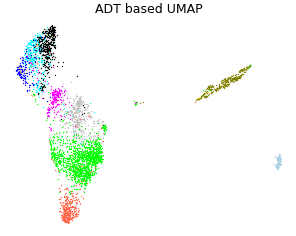

Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP
Always use exact mode: JUMAP


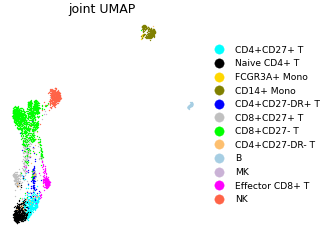

My name is Hoan
Always use exact mode


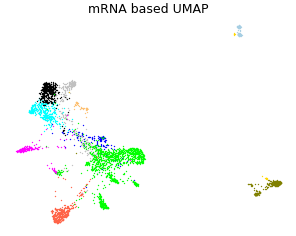

In [11]:
for alpha in [0.0, 0.5, 1.0]:
    if alpha==1.0:
        Z = UMAP(n_neighbors=n_NN, min_dist=min_dist, metric=metrics, repulsion_strength=0.1).fit_transform(rna_matrix)
    elif alpha==0.0:
        Z = UMAP(n_neighbors=n_NN, min_dist=min_dist, metric=metrics, repulsion_strength=0.1).fit_transform(adt_matrix)
    else:
        Z = JUMAP(n_neighbors=n_NN, min_dist=min_dist, metric=metrics, repulsion_strength=0.5).fit_transform(X = {'adt': adt_matrix, 'rna': rna_matrix}, method = "auto", ld = 1.0)

    data2 = pd.DataFrame({'x': Z[:,0], 'y': Z[:,1], 'label': labels_true-np.min(labels_true) + 1})
    colors = ['cyan','black', 'gold', 'olive', 'blue', 'silver', 'lime','#fdbf6f','#a6cee3','#cab2d6','magenta','tomato', 'olive',
                     'cyan','black', 'gold', 'magenta', 'blue', 'silver', 'lime','#fdbf6f','#a6cee3','#cab2d6','#fb9a99','tomato', 'olive']
    
    figwidth = 11 if alpha==0.5 else 10
    plt.figure(figsize=(figwidth, 8), dpi = dpi)
    for label in range(1, len(np.unique(labels_true))+1, 1):
        #add data points 
        i = label-1
        plt.scatter(x=data2.loc[data2['label']==label, 'x'], 
                    y=data2.loc[data2['label']==label,'y'], 
                    color=colors[i], 
                    alpha=1, s = 5, label = cell_types[i])
        plt.tight_layout()
        if alpha == 1.0:
            plt.title("mRNA based UMAP", fontdict = {'fontsize' : title_fz})
        elif alpha == 0.0:
            plt.title("ADT based UMAP", fontdict = {'fontsize' : title_fz})
        else:
            plt.title("joint UMAP", fontdict = {'fontsize' : title_fz})
            plt.legend(loc='center left', numpoints=1, ncol=1, fontsize=22, markerscale=10, frameon=False, bbox_to_anchor=(1, 0.5))

        plt.axis('off')
    if alpha == 1.0:
        plt.savefig('/data/hoan/plots/celltype/pbmc_'+method+'_on_RNAbasedUMAP.pdf', dpi = dpi)
    elif alpha == 0.0:
        plt.savefig('/data/hoan/plots/celltype/pbmc_'+method+'_on_ADTbasedUMAP.pdf', dpi = dpi)
    else:
        plt.savefig('/data/hoan/plots/celltype/pbmc_'+method+'_on_jointUMAP.pdf', dpi = dpi)
    plt.show()